#Gravitational wave data analysis Assignment
Question 1 

In [2]:
import sys
!{sys.executable} -m pip install pycbc lalsuite ligo-common --no-cache-dir

     |████████████████████████████████| 3.2MB 7.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 27.3MB 1.3MB/s 
     |████████████████████████████████| 481kB 52.0MB/s 
     |████████████████████████████████| 1.6MB 50.1MB/s 
     |████████████████████████████████| 61kB 48.0MB/s 
     |████████████████████████████████| 890kB 48.2MB/s 
     |████████████████████████████████| 61kB 48.0MB/s 
     |████████████████████████████████| 3.2MB 48.0MB/s 
  Created wheel for pycbc: filename=PyCBC-1.17.0-cp36-cp36m-linux_x86_64.whl size=5711445 sha256=e633ef6519908500330a897a1beddad41d3e791f503df51108465f641f8ea823
  Stored in directory: /tmp/pip-ephem-wheel-cache-nq3t32mw/wheels/51/1c/69/7de581c512e9465dad0d6a955c4a947425799fe14f6226d3a8
Successfully built pycbc
  Created wheel for emcee: filename=emcee-2.2.1-cp36-none-any.whl size=29596 sha256=ddd8d938eb9708a465c4db40e1d988f0

In [ ]:
%matplotlib inline
from pycbc.waveform import td_approximants, fd_approximants
import pylab

print(fd_approximants())

['EccentricFD', 'TaylorF2', 'TaylorF2Ecc', 'TaylorF2NLTides', 'TaylorF2RedSpin', 'TaylorF2RedSpinTidal', 'SpinTaylorF2', 'EOBNRv2_ROM', 'EOBNRv2HM_ROM', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'SEOBNRv2_ROM_DoubleSpin_HI', 'Lackey_Tidal_2013_SEOBNRv2_ROM', 'SEOBNRv4_ROM', 'SEOBNRv4HM_ROM', 'SEOBNRv4_ROM_NRTidal', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'SEOBNRv4T_surrogate', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidal', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomP', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'SpinTaylorT4Fourier', 'SpinTaylorT5Fourier', 'NRSur4d2s', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'SpinTaylorF2_SWAPPER', 'TaylorF2NL', 'PreTaylorF2', 'multiband', 'TaylorF2_INTERP', 'SEOBNRv1_ROM_EffectiveSpin_INTERP', 'SEOBNRv1_ROM_DoubleSpin_INTERP', 'SEO

--2021-02-20 21:22:23--  https://dcc.ligo.org/public/0146/P1700349/001/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57824232 (55M)
Saving to: ‘H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf’

H-H1_LOSC_CLN_4_V1- 100%[===================>]  55.14M  69.4MB/s    in 0.8s    

2021-02-20 21:22:24 (69.4 MB/s) - ‘H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf’ saved [57824232/57824232]

--2021-02-20 21:22:24--  https://dcc.ligo.org/public/0146/P1700349/001/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62070438 (59M)
Saving to: ‘L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf’

L-L1_LOSC_CLN_4_V1- 100%[===================>]  59.19M  71.1MB/s    in 0.8s    

20

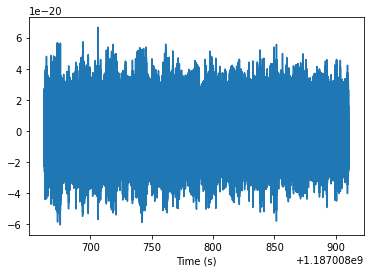

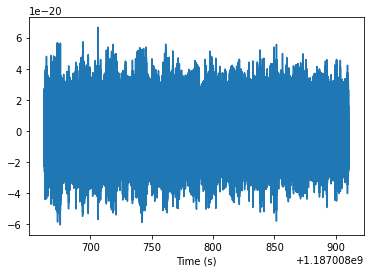

In [ ]:
!wget -nc https://dcc.ligo.org/public/0146/P1700349/001/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf
!wget -nc https://dcc.ligo.org/public/0146/P1700349/001/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf



%matplotlib inline
import pylab
from pycbc.filter import highpass
from pycbc.catalog import Merger
from pycbc.frame import read_frame

merger = Merger("GW170817")
import numpy as np
import pycbc.types 

strain, stilde = {}, {}
for ifo in['H1','L1']:
  # We'll download the data and select 256 secondsthat includes the event time
  ts =read_frame("{}-{}_LOSC_CLN_4_V1-1187007040-2048.gwf".format(ifo[0],ifo),'{}:LOSC-STRAIN'.format(ifo),start_time=merger.time -224,end_time=merger.time +32,check_integrity=False)
  # Read the detector data and remove low frequencycontent
  strain[ifo] = highpass(ts,15)
  # Remove time corrupted by the high pass filter
  strain[ifo] = strain[ifo].crop(4,4)
  # Also create a frequency domain version of the data
  stilde[ifo] = strain[ifo].to_frequencyseries()
  #print (strain.delta_t)
  pylab.plot(strain['H1'].sample_times, strain['H1'])
  pylab.xlabel('Time (s)')
  pylab.show()


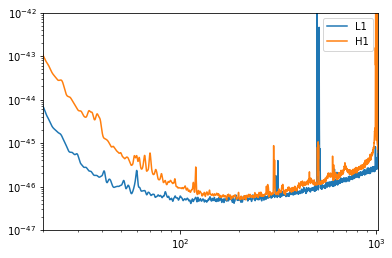

In [ ]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
psds = {}
for ifo in ['L1','H1']:
# Calculate a psd from the data. We'll use 2s segments in a median -welch style estimate# We then interpolate the PSD to the desired frequencystep.
  psds[ifo] = interpolate(strain[ifo].psd(2), stilde[ifo].delta_f)
# We explicitly control how much data will be corruptedbyoverwhitening the data later on# In this case we choose 2 seconds.
  psds[ifo] = inverse_spectrum_truncation(psds[ifo],int(2*strain[ifo].sample_rate),low_frequency_cutoff=15.0,trunc_method='hann')
  pylab.loglog(psds[ifo].sample_frequencies, psds[ifo],label=ifo)
  pylab.xlim(20,1024)
  pylab.ylim(1e-47,1e-42)
pylab.legend()

In [ ]:
from pycbc.waveform import get_fd_waveform
from pycbc.filter import matched_filter
from pycbc.conversions import mass1_from_mchirp_q
import numpy
# We will try different component masses and see whichgives us thelargest
masses = numpy.arange(1.3,1.5,.01)
# Variables to store when we've found the max
hmax, smax, tmax, mmax, nsnr = None, {}, {},0,0
snrs = []
for m in masses:
  #Generate a waveform with a given component mass;assumed equal mass,nonspinning
  hp, hc = get_fd_waveform(approximant="TaylorF2",
                           mass1=m, mass2=m,
                           f_lower=20, 
                           delta_f=stilde[ifo].delta_f)
  hp.resize(len(stilde[ifo]))
  # Matched filter the data and find the peak
  max_snr, max_time = {}, {}
  for ifo in ['L1','H1']:
    snr = matched_filter(hp, stilde[ifo], psd=psds[ifo],low_frequency_cutoff=20.0)
    # The complex SNR at the peak
    snr = snr.time_slice(merger.time -1, merger.time+1)
    _, idx = snr.abs_max_loc()
    max_snr[ifo] = snr[idx]
    # The time of the peak
    max_time[ifo] = float(idx) / snr.sample_rate+ snr.start_time
  network_snr = (abs(numpy.array(list(max_snr.values())))**2.0).sum()**0.5
  snrs.append(max_snr)
  # Keep track of only the loudest peak
  if network_snr > nsnr:
    tmax, hmax, mmax, smax = max_time, hp, m, max_snr
    nsnr = network_snr
    # See the SNR as a function of the component mass.Notice where this peaksas it gives us
    # an estimate of what the parameters of the sourcesystem are. Note thatmasses
    # here are in the *detector* frame, so if the sourceis located far away,it will in# fact correspond to a lighter system due to cosmologicalredshift.
print("We found the best Mass1=Mass2 was %2.2f solarmasses (detectorframe)"% mmax)

We found the best Mass1=Mass2 was 1.38 solarmasses (detectorframe)


#Gravitational wave data analysis Assignment 
Question 2

In [ ]:
import numpy as np

import pycbc.types 
d = np.load('/content/drive/MyDrive/Colab Notebooks/noise_ts_4096Hz.npy')

dt = d[:, 0]
d = pycbc.types.TimeSeries(d[:, 1], delta_t = dt[1]- dt[0])
data = d



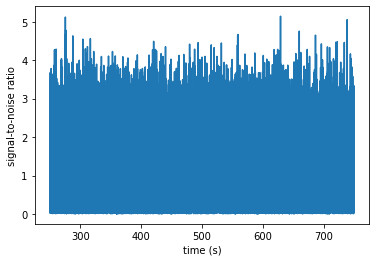

Maximum SNR 5.142557710685181


In [ ]:
import numpy as np
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import pylab
from pycbc.psd import welch, interpolate
flow = 30
psds = interpolate(welch(d), 1.0 / d.duration)
stilde = data.to_frequencyseries()
hp, hc = pycbc.waveform.get_fd_waveform(approximant="TaylorF2",
                             mass1=10, mass2=10,
                             f_lower=flow, delta_f=stilde.delta_f)
hp.resize(len(stilde))  
snr = pycbc.filter.matched_filter(hp, stilde, psd=psds,
                                      low_frequency_cutoff=flow)
snr = snr[len(snr) // 4: len(snr) * 3 // 4]

pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('signal-to-noise ratio')
pylab.xlabel('time (s)')
pylab.show()
print ( 'Maximum SNR', max(abs(snr)) )



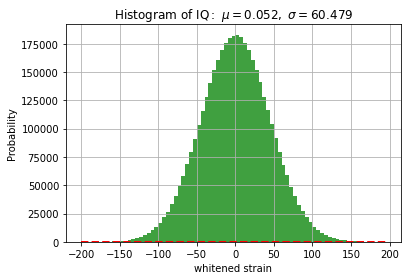

In [4]:
import pycbc.psd
from scipy.stats import norm
from pycbc.psd import welch, interpolate
import pycbc.types 
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
d = np.load('/content/drive/MyDrive/Colab Notebooks/noise_ts_4096Hz.npy')

dt = d[:, 0]
d = pycbc.types.TimeSeries(d[:, 1], delta_t = dt[1]- dt[0])
1.0/d.delta_t
psds = interpolate(welch(d), 1.0 / d.duration)

data = d
white_data = (data.to_frequencyseries()/psds**0.5).to_timeseries()
white_data.crop(4,4)
x = range(-200,200,5)
 
(mu, sigma) = norm.fit(white_data)

n, bins, patches = plt.hist(white_data,x, 60, facecolor='green', alpha=0.75)


y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.grid(True)

plt.xlabel('whitened strain')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))

plt.show()

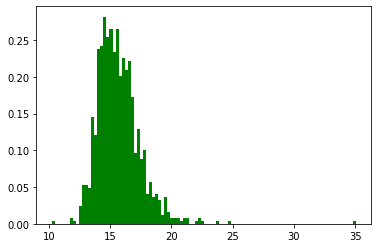

In [12]:
from pycbc.filter import sigmasq  
from pycbc.waveform import get_fd_waveform
from pycbc.waveform import get_fd_waveform
max = 1000
hp, hc = get_fd_waveform(approximant="TaylorF2",   
                         mass1=3,                  
                         mass2=3,   
                         delta_f = 1.0/(200),              
                         #delta_f=1.0/(200.0) ,     
                         distance = 500,           
                         f_lower=20.0, f_final = 2048.0)    #Luminosity distance = 500 Mpc



slice_data = int(len(data)/max)

SNRList = []
for i in range(max):
  data_chunk = data[i*slice_data : (i+1)*slice_data]

  psds = pycbc.psd.interpolate(pycbc.psd.welch(data_chunk), hp.delta_f)

  optSNR = (pycbc.filter.sigmasq(hp, psds))**0.5

  SNRList.append(optSNR)




#SNR = (np.sum((4*hp*np.conj(hp)*hp.delta_f/psd).data).real)**0.5
#x = range(0,25,5)
plt.hist(SNRList, 100, density = True, color = 'green')
plt.show()

#Gravitational wave data analysis Assignment
Question 3

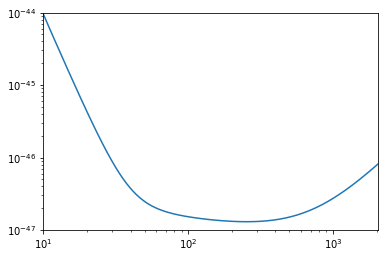

In [37]:
import pycbc.psd
import numpy as np
flow = 4.0   # set up the lower cut off frequency
delta_f = 1.0 / 16
flen = int(2048.0/ (delta_f)) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
psd.data[:int(flow/delta_f)] = np.inf  #set the value outside the frequency range to infinity>>>>psd.data[-1] = np.inf

psd.data[-1] = np.inf

pylab.loglog(psd.sample_frequencies, psd)
pylab.xlim(10,2048)
pylab.ylim(1e-47, 1e-44)
pylab.show()

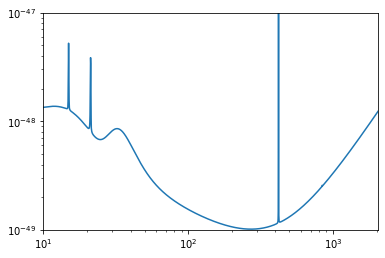

In [32]:
import pycbc.psd
import numpy as np
flow = 4.0   # set up the lower cut off frequency
delta_f = 1.0 / 16
flen = int(2048.0/ (delta_f)) + 1
psd = pycbc.psd.EinsteinTelescopeP1600143(flen, delta_f, flow)
psd.data[:int(flow/delta_f)] = np.inf  #set the value outside the frequency range to infinity
psd.data[-1] = np.inf

pylab.loglog(psd.sample_frequencies, psd)
pylab.xlim(10,2048)
pylab.ylim(1e-49, 1e-47)
pylab.show()